In [1]:
#importing libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

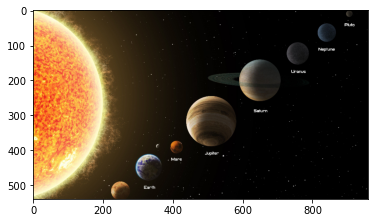

In [2]:
#reading the image and transforming it to gray scale
image = cv2.imread("planets.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(image.shape[1]//4,image.shape[0]//4))
plt.imshow(image)

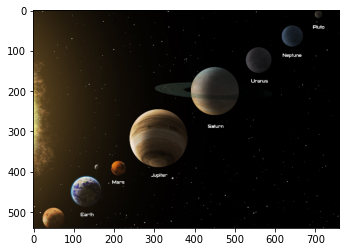

In [3]:
#cropping the sun as it is detected as false circles
image = image[:,200:,:]
plt.imshow(image)

In [4]:
#applying canny edge detection
image_2 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(image_2,100,255)
#applying Gaussian blur since it imporved the results by 3 more planets
image_gbf = cv2.GaussianBlur(edges,(5,5),0)

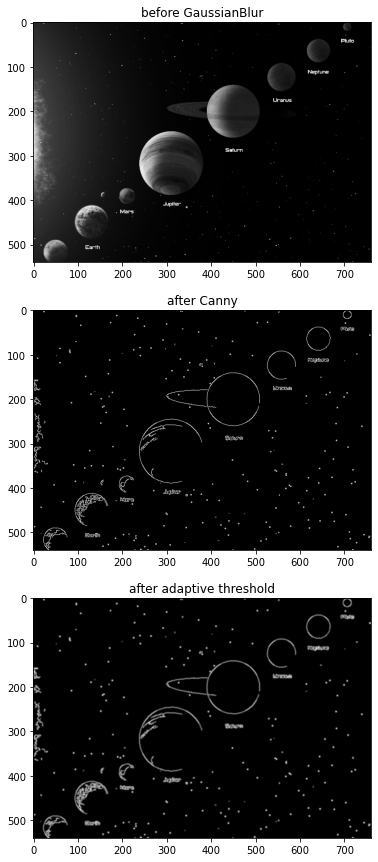

In [5]:
#showing processes results
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize = (15,15))
ax1.set_title("before GaussianBlur")
ax1.imshow(image_2, cmap = "gray")
ax2.set_title("after Canny")
ax2.imshow(edges, cmap = "gray")
ax3.set_title("after adaptive threshold")
ax3.imshow(image_gbf, cmap = "gray")

7


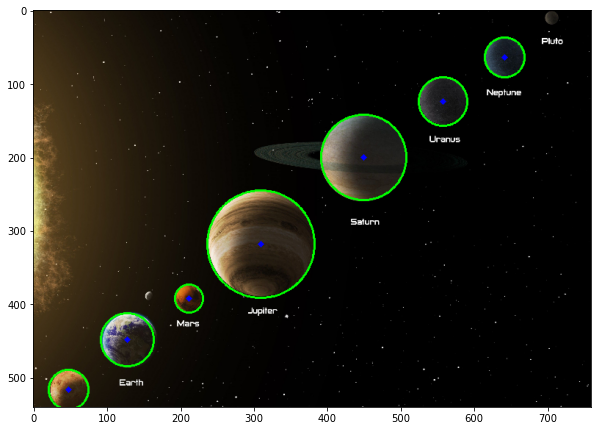

In [6]:
#creating the Hough circle detector
#I tuned the parameters manually until it came up with best results
circles = cv2.HoughCircles(image_gbf,cv2.HOUGH_GRADIENT
                           ,1
                           , minDist=90
                           , param1 = 20
                           , param2 = 30
                           ,minRadius = 2
                           , maxRadius = 80)
circles = np.uint16(np.around(circles))
image_2 = np.copy(image)
#plotting the circles on the image
for circle in circles[0,:]:
    #the circles' circumference
    cv2.circle(image_2,tuple(circle[0:2]),circle[2],(0,255,0),2)
    #the circles' center
    cv2.circle(image_2,tuple(circle[0:2]),2,(0,0,255),3)

print(len(circles[0,:]))
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.imshow(image_2, cmap = "gray")

# Why Pluto is not circled?
## Pluto is not a planet anyway

### P.S: the image didn't contain Mercury to begin with, so I guess he is cool